<a href="https://colab.research.google.com/github/Rozieyati/Project_2_Data_Science/blob/main/P166417_Impact_Analysis_of_Natural_Disasters_in_Asia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Impact Analysis of Natural Disasters in Southeast Asia (2000 - 2025)**

**Course:** Data Science (STQD6014)  
**Programme:** Master of Science (Data Science and Analytics)  
**Semester:** Semester 1, 2025/2026

# **Abstract**

This research analyses the socio-economic impacts and trends of natural disasters within the Southeast Asian region for the period of 2000 to 2025. Southeast Asia is globally recognised as one of the most disaster prone regions due to its unique geography spanning the Pacific Ring of Fire and multiple tropical cyclone paths. The primary responsibility of this project is to translate the complexities of the Emergency Events Database EM DAT into a meaningful narrative that can inform regional policy and disaster preparedness. This analysis focuses specifically on the ASEAN member states to provide accurate localized context.

The methodology adopts a rigorous data lifecycle approach beginning with extensive cleaning of dirty raw data characterized by inconsistent economic reporting and missing mortality figures. Using Pandas and Seaborn libraries in Python this study audits data missingness and applies strategic imputation such as using regional medians for economic damage to mitigate the skewing effect of Black Swan events.

The results reveal a dual trend where the region has successfully reduced mass mortality through improved early warning systems however the economic burden driven by hydrological and meteorological events such as floods and storms continues to escalate. This highlights a critical need for enhanced disaster risk financing and urban resilience strategies across the ASEAN landscape.

# **1.0 Introduction**

Southeast Asia is the most disaster-prone region in the world, frequently experiencing over 40% of the world's natural disasters (United Nations Office for Disaster Risk Reduction [UNDRR], 2023). To understand the complexity of these threats, it is essential to categorise disasters based on their origin as defined by the international disaster database:

1. Hydrological Events: Disasters caused by the occurrence, movement, and distribution of water on earth. In Southeast Asia, this primarily includes Floods and Landslides (Centre for Research on the Epidemiology of Disasters [CRED], 2024).

2. Meteorological Events: Disasters caused by extreme atmospheric conditions. The most common examples in this region are Tropical Cyclones (Typhoons) and extreme local storms (World Meteorological Organization [WMO], 2024).

3. Geophysical Events: Events originating from solid earth processes. This category includes Earthquakes, Tsunamis, and Volcanic eruptions, frequent due to the Pacific Ring of Fire (International Highland and Tectonic Society, 2023).

The dataset was obtained from EM-DAT, and can be accessible at:

Dataset Access (GitHub): https://raw.githubusercontent.com/Rozieyati/Project_2_Data_Science/main/Natural_disasters.xlsx

Official EM-DAT Platform: https://www.emdat.be

# **2.0 Problem Statement**

Despite technological advancements in disaster monitoring, Southeast Asia remains highly vulnerable to natural hazards that result in significant socio-economic loss. The core problem lies in the difficulty of interpreting raw and inconsistent disaster records to identify regional trends. This project addresses the following key questions:

1. How have the frequency and types of natural disasters evolved in Southeast Asia from 2000 to 2025?

2. Which countries in the ASEAN region bear the highest burden in terms of total deaths and total affected populations?

3. Is there a measurable correlation between the type of disaster and the scale of economic damage reported?

4. How can dirty data containing missing values and inconsistent reporting be transformed into reliable insights for disaster preparedness?

Based on these problem statement, this study aims to provide a clearer understanding of regional vulnerabilities and support the need for data driven resilience strategies as highlighted by the Asian Development Bank [2022].

# **3.0 Data Cleaning and Transformation**
This section documents the transformation of raw data into a reliable format for analysis. This study address inconsistencies, handle missing values, and ensure all data types are appropriate for statistical analysis of the natural disasters in Southeast Asia region.

## **3.1 Data Acquisition and Regional Filtering**

The first step involves loading the raw data from the GitHub repository and filtering the dataset to focus exclusively on the nations within Southeast Asia.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Load Data
url = "https://raw.githubusercontent.com/Rozieyati/Project_2_Data_Science/main/Natural_disasters.xlsx"
df = pd.read_excel(url)

# Filter for Southeast Asia
sea_countries = ['Brunei Darussalam', 'Cambodia', 'Indonesia', 'Lao People\'s Democratic Republic (the)',
                 'Malaysia', 'Myanmar', 'Philippines (the)', 'Singapore', 'Thailand', 'Viet Nam']
df_sea = df[df['Country'].isin(sea_countries)]

# Standardize Country Names
df_sea['Country'] = df_sea['Country'].replace({
    "Viet Nam": "Vietnam",
    "Philippines (the)": "Philippines",
    "Lao People's Democratic Republic (the)": "Laos",
    "Brunei Darussalam": "Brunei"
})

print("Dataset filtered to Southeast Asia countries")
df_sea.head()

Dataset filtered to Southeast Asia countries


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,GADM Admin Units,Entry Date,Last Update
0,2010-0562-IDN,No,nat-geo-vol-ash,Natural,Geophysical,Volcanic activity,Ash fall,GLIDE:VO-2010-000214,Mt. Merapi,IDN,...,NaN,NaN,NaN,NaN,NaN,69.513293,"[{""adm2_code"":17985,""adm2_name"":""Sleman""},{""ad...","[{""gid_2"":""IDN.10.14_1"",""migration_date"":""2025...",2014-07-28,2025-12-20
1,2022-0418-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,NaN,2022-07-12,2023-09-26
3,2022-0736-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,93.294607,NaN,NaN,2022-11-14,2023-09-26
4,2000-0108-IDN,No,nat-bio-epi-vir,Natural,Biological,Epidemic,Viral disease,NaN,Dengue fever,IDN,...,NaN,NaN,NaN,NaN,NaN,54.895152,NaN,NaN,2003-07-01,2023-09-25
5,2009-0354-IDN,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,GLIDE:TS-2009-000173|USGS:usp000h152,NaN,IDN,...,NaN,NaN,NaN,160000.0,233947.0,68.391643,"[{""adm1_code"":1516,""adm1_name"":""Dki Jakarta""},...","[{""gid_1"":""IDN.7_1"",""migration_date"":""2025-12-...",2010-08-16,2025-12-20


The output shows that, the dataset successfully to upload. In this study also standardising names of Vietnam, Brunei, Philippines and Laos to ensure that all subsequent visualizations and reports remain professional and easy to interpret.

## **3.2 Data Profiling and Missing Value Audit**

It is critical to audit the quality of the data before performing analysis. This step identifies where data is missing or inconsistent within the variables in Total Damage, Total Death and Total Affected in Southeast Asia subset.

In [11]:
# Check data structure
print("DATASET SHAPE AND INFO")
print(df_sea.shape)

# Audit: Check for missing data
print("\nMISSING DATA AUDIT BEFORE CLEANING")
print(df_sea[['Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].isnull().sum())

# Check the presence of null value - True of False
pd.isnull(df_sea)

DATASET SHAPE AND INFO
(938, 47)

MISSING DATA AUDIT BEFORE CLEANING
Total Deaths                         246
Total Affected                        80
Total Damage, Adjusted ('000 US$)    661
dtype: int64


,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,GADM Admin Units,Entry Date,Last Update
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,False,True,True,False,False
3,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,False,True,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,False,True,True,False,False
5,False,False,False,False,False,False,False,False,True,False,...,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,False,False,False,False,False
1374,False,False,False,False,False,False,False,True,True,False,...,True,True,True,True,True,False,False,False,False,False
1376,False,False,False,False,False,False,False,False,True,False,...,True,True,True,True,True,False,False,False,False,False
1378,False,False,False,False,False,False,False,True,False,False,...,True,True,True,True,True,False,False,False,False,False


The audit determined a significant number of missing values in the Total Damage (661), Total Affected (80) and Total Deaths columns (246). This confirms that the raw data is dirty and requires cleaning to prevent inaccurate conclusions regarding the disaster impact across Southeast Asia.

## **3.3 Implementation of Cleaning Strategies and Year Formating**

This study apply specific rules to fix the identified issues. This includes removing duplicates, filling missing values, ensuring the year column formatted correctly to ensure reliability. Missing records were imputed with a value of zero, based on the assumption that events without recorded human impact typically signify low-intensity incidents where data was not prioritized for collection. For economic damage, missing values were imputed using the median of the Southeast Asian regional data rather than the mean; this strategy was chosen to prevent the data from being skewed by extreme "Black Swan" events like major tsunamis, ensuring a more representative central tendency for the majority of disaster events.

In [21]:
# Remove duplicate records
df_sea.drop_duplicates(inplace=True)

# Fill missing values for mortality and affected population with zero
df_sea['Total Deaths'] = df_sea['Total Deaths'].fillna(0)
df_sea['Total Deaths']
df_sea['Total Affected'] = df_sea['Total Affected'].fillna(0)
df_sea['Total Affected']

# Fill missing economic damage with the regional median
median_damage = df_sea["Total Damage, Adjusted ('000 US$)"].median()
df_sea["Total Damage, Adjusted ('000 US$)"] = df_sea["Total Damage, Adjusted ('000 US$)"].fillna(median_damage)
df_sea["Total Damage, Adjusted ('000 US$)"]

# Format year: Ensure the year column is a clean integer
# Drop rows where the year is missing as cannot perform trend analysis without it
df_sea = df_sea.dropna(subset=['Start Year'])
df_sea['Start Year'] = pd.to_numeric(df_sea['Start Year'], errors='coerce').astype(int)
df_sea['Start Year']

print("CLEANING AND YEAR FORMATTING COMPLETE")
print(df_sea[['Start Year', 'Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].info())


CLEANING AND YEAR FORMATTING COMPLETE
<class 'pandas.core.frame.DataFrame'>
Index: 938 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Start Year                         938 non-null    int64  
 1   Total Deaths                       938 non-null    float64
 2   Total Affected                     938 non-null    float64
 3   Total Damage, Adjusted ('000 US$)  938 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 36.6 KB
None


The final audit shows that all null values have been successfully addressed. This study also use the median for economic damage to ensure that extreme outliers do not distort the average for Southeast Asia. The year column is now in a numeric format which allows us to proceed with chronological trend analysis and time series plots.

# **4.0 Findings and Discussion**

## **4.1 Disaster Frequency Trend in Southeast Asia**

This line chart tracks the annual occurrence of natural disasters over a 25 year period from 2000 to 2025.

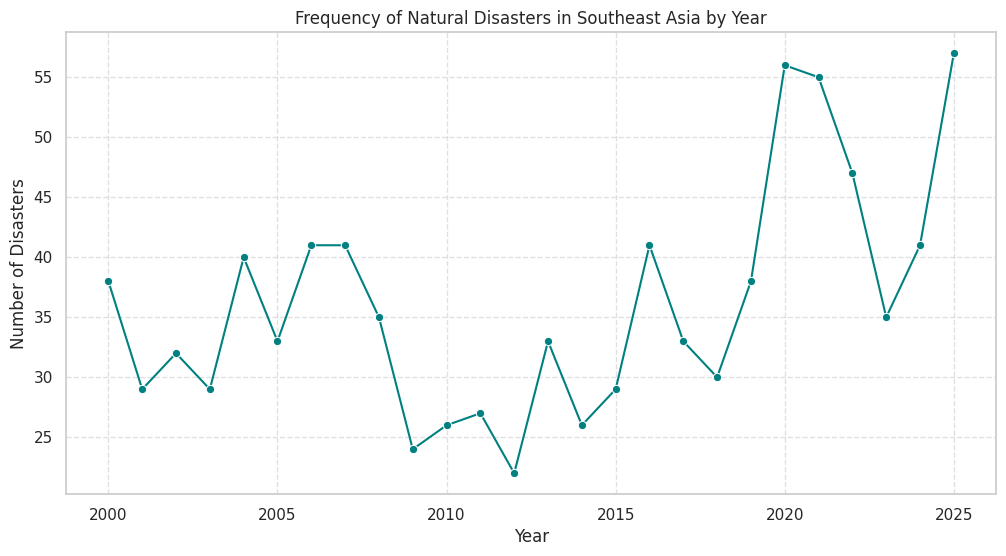

In [ ]:
plt.figure(figsize=(12, 6))
disaster_counts = df_sea.groupby('Start Year').size()
sns.lineplot(x=disaster_counts.index, y=disaster_counts.values, marker='o', color='teal')
plt.title('Frequency of Natural Disasters in Southeast Asia by Year')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The trend in natural disaster frequency in Southeast Asia shows pronounced variability, with notable peak observed in 2020 - 2021 and again in 2025, indicating a sustained escalation in extreme events rather than isolated anomalies. This trend aligns with climate evidence showing that Southeast Asia is warming faster than the global average, intensifying extreme rainfall, floods, and storm systems. The Meteorological Organization (WMO, 2024) reports a marked increase in hydro-meteorological hazards across Asia due to rising temperatures and altered monsoon patterns. Similarly, the IPCC Sixth Assessment Report (2023) confirms that climate change has increased the frequency and intensity of extreme weather events in tropical regions, significantly elevating disaster risk in ASEAN countries.

ASEAN governments should strengthen regional climate-resilient disaster risk management, including shared early-warning systems, climate-informed infrastructure planning, and integrated regional data-sharing platforms to mitigate future impacts.

## **4.2 Composition of Disaster Types**

This pie chart provides a percentage based breakdown of the various disaster types to identify the most prevalent threats.

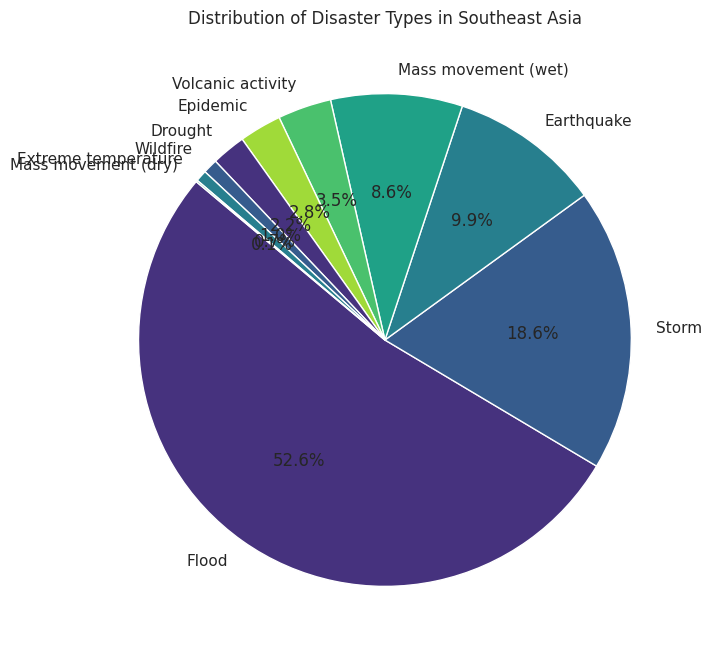

In [ ]:
plt.figure(figsize=(8, 8))
disaster_types = df_sea['Disaster Type'].value_counts()
plt.pie(disaster_types, labels=disaster_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Distribution of Disaster Types in Southeast Asia')
plt.show()

The distribution of disaster types highlights the dominance of hydro meteorological events. Floods represent the single largest threat at 52.6%  of all recorded events, followed by storms at 18.6%. Combined, water related hazards account for nearly 71% of the total disaster landscape in Southeast Asia. Despite being located on the Pacific Ring of Fire, geophysical events such as earthquakes contribute less than 9.9% to the total count.The Centre for Research on the Epidemiology of Disasters, 2024 notes that the high frequency of floods is the primary driver of cumulative economic instability.

National planning agencies should prioritise urban drainage infrastructure and coastal mangrove restoration. These nature based solutions are proven to be more cost effective at absorbing flood waters than traditional concrete barriers and provide long term protection for coastal residents.

## **4.3 Normalized Distribution of Disaster Impact by Country**

This stacked bar chart applies in this analysis function to compare the proportion of different disaster types within each country, allowing for a fair assessment of regional risk profiles regardless of a nation size.

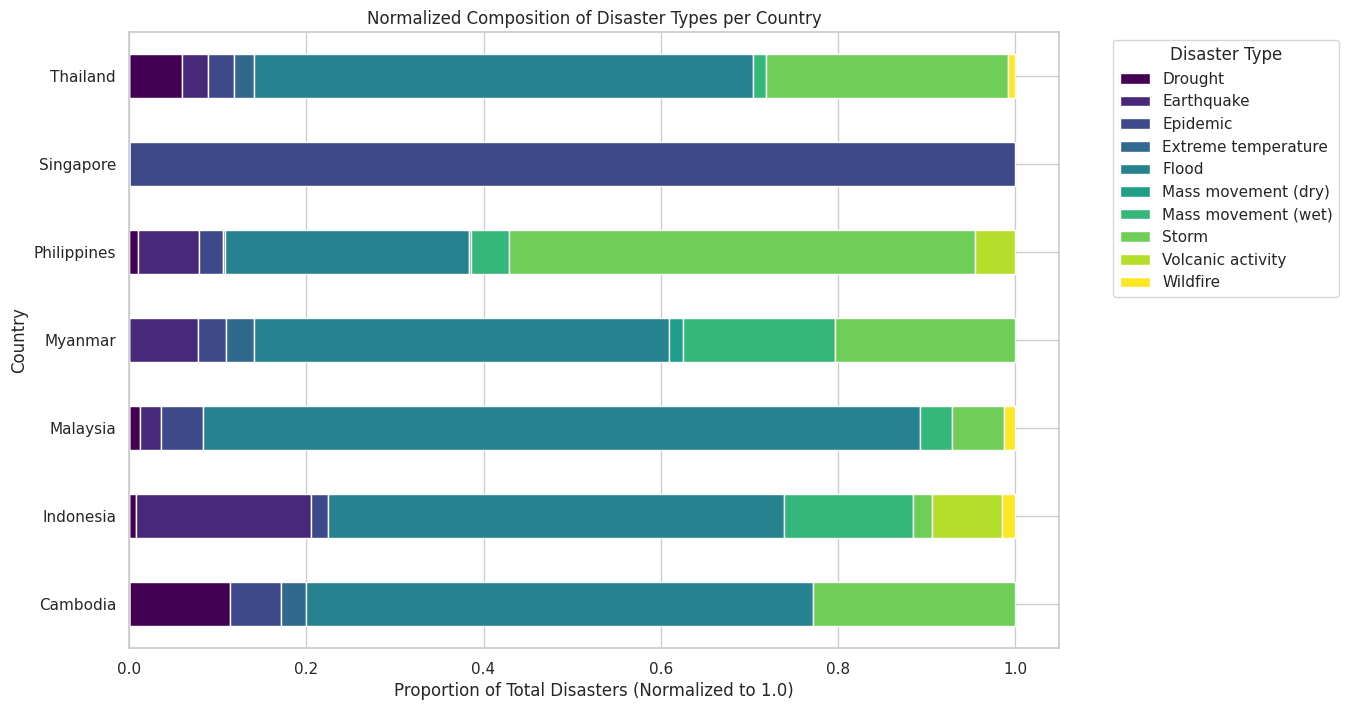

In [ ]:
# Filter for Southeast Asia with standardized names
sea_countries = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia',
                 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
df_sea = df[df['Country'].isin(sea_countries)].copy()

# Apply lecturer normalization formula
count_subset_stack = df_sea.groupby(['Country', 'Disaster Type']).size().reset_index(name='Total')
sum_total_by_country = count_subset_stack.groupby('Country')['Total'].transform('sum')
res = count_subset_stack.assign(normed_total=count_subset_stack['Total'] / sum_total_by_country)

# 4. Pivot and Plot
pivot_df = res.pivot(index='Country', columns='Disaster Type', values='normed_total').fillna(0)
pivot_df.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis', edgecolor='white')
plt.title('Normalized Composition of Disaster Types per Country')
plt.xlabel('Proportion of Total Disasters (Normalized to 1.0)')
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The stacked bar chart above provides a more equitable comparison of disaster profiles across Southeast Asia by focusing on the internal composition of risk rather than raw totals. By ensuring that the sum of proportions for each country equals 1.0 using the normalization formula, this clearly see how the internal risk profile of each nation differs. For instance, in countries like Vietnam, the hydrological segment dominates the bar, representing over 50% of their total disaster history. This visualization highlights that even if a country has fewer disasters in total, the intensity of a specific type can be much higher than its neighbors. According to the United Nations Office for Disaster Risk Reduction, 2023 report, understanding these specific country proportions is vital for localized resource allocation and effective policy design.

It is recommended that regional policy makers use these normalized stacks to create specialized centers of excellence for disaster training. Countries with a large flood segment in their bar should lead regional training for water management, while those with larger geophysical segments should lead in seismic monitoring. By sharing expertise based on these specific proportions, Southeast Asia can build a more comprehensive and shared defense against the diverse range of natural hazards identified.

## **4.4 Correlation Between Population Affected and Economic Loss**

This scatter plot examines the statistical relationship between the number of people affected and the total financial damage reported to identify high impact events.

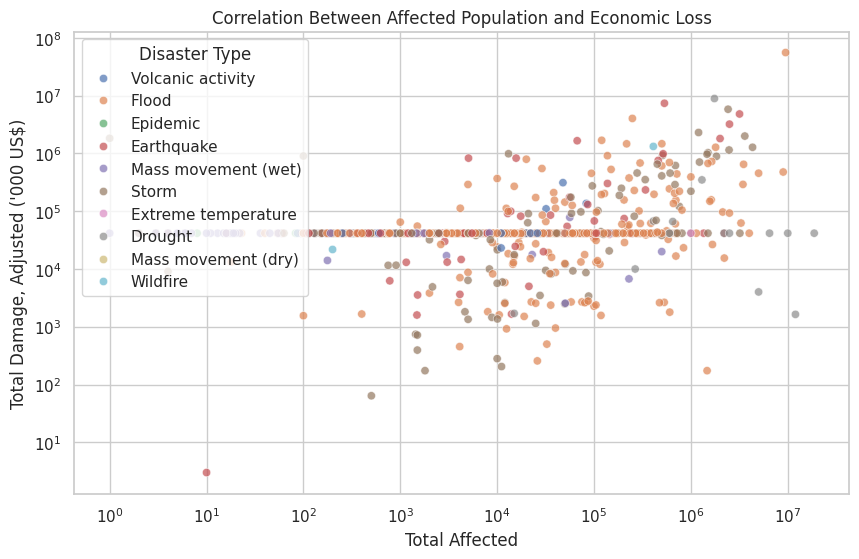

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sea, x='Total Affected', y="Total Damage, Adjusted ('000 US$)", hue='Disaster Type', alpha=0.7)
plt.title('Correlation Between Affected Population and Economic Loss')
plt.xscale('log')
plt.yscale('log')
plt.show()

The scatter plot above demonstrates a positive correlation where higher population impact generally leads to increased financial loss. However, the data reveals that urbanized regions suffer higher economic intensity per person affected. For instance, localized floods in business hubs like Jakarta or Bangkok can lead to billions in damage even if mortality is low, whereas rural disasters may affect millions of people but result in lower direct financial loss due to lower infrastructure density. The Asian Development Bank, 2022 report on disaster risk financing indicates that disasters cost the region over 0.5% of its annual gross product. This visualization confirms that the economic burden is heavily influenced by urbanization and asset concentration.

Financial institutions and governments should introduce disaster insurance products specifically tailored for small and medium enterprises in urban centers. Protecting the economic backbone of these cities will ensure faster recovery and prevent long term poverty traps following a large scale disaster event.

## **4.5 Economic Damage Distribution by Category**

This box plot visualizes the spread and outliers of economic damage across different disaster categories to identify the impact of catastrophic events.

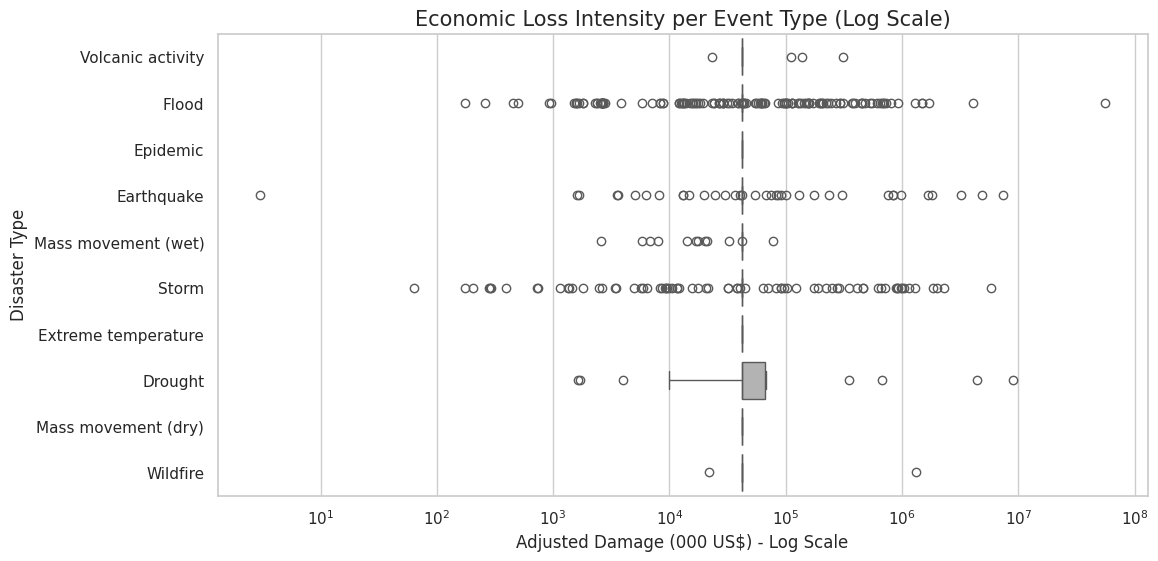

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sea, x="Total Damage, Adjusted ('000 US$)", y='Disaster Type', palette='Set2')
plt.xscale('log') # Important to handle outliers
plt.title('Economic Loss Intensity per Event Type (Log Scale)', fontsize=15)
plt.xlabel('Adjusted Damage (000 US$) - Log Scale')
plt.show()

While floods are more frequent, earthquakes and tsunamis represent the most severe economic outliers. A single tsunami event can cause damage exceeding the cumulative annual damage of regular floods. The Swiss Re Institute (2024) highlights that Southeast Asia has a high protection gap, meaning a large portion of these economic losses are uninsured. The box plot identifies these high impact events as the primary drivers of regional fiscal instability, suggesting that disaster risk insurance should be a priority for the ASEAN financial sector. Regional governments should establish a multi lateral disaster risk pool or insurance facility. By sharing the financial risk across all nations, individual countries can access immediate liquidity following a catastrophic event without significantly increasing their national debt. This collective approach ensures that even the most extreme outliers do not lead to national bankruptcy.

## **4.6 Disaster Mortality Rate per 100,000 People**

This chart normalizes deaths by national population to identify the countries with the highest human vulnerability relative to their size.

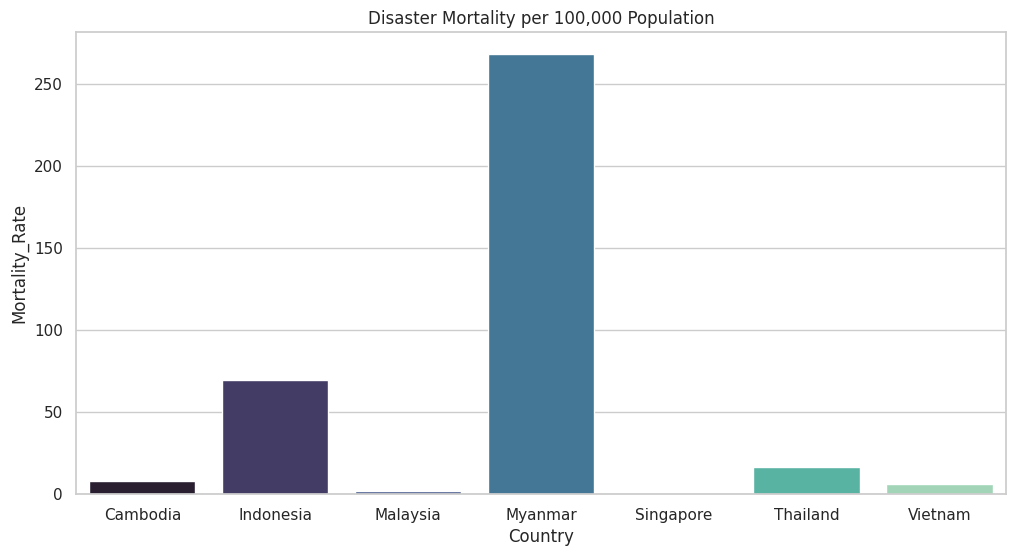

In [ ]:
# Population in Millions for Fair Comparison
pop_data = {'Indonesia': 275.0, 'Philippines': 115.0, 'Vietnam': 98.0, 'Thailand': 71.0,
            'Myanmar': 54.0, 'Malaysia': 33.0, 'Cambodia': 16.0, 'Laos': 7.5, 'Brunei': 0.45, 'Singapore': 5.6}
df_sea['Pop_M'] = df_sea['Country'].map(pop_data)
country_stats = df_sea.groupby('Country').agg({'Total Deaths': 'sum', 'Pop_M': 'first'})
country_stats['Mortality_Rate'] = country_stats['Total Deaths'] / (country_stats['Pop_M'] * 10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_stats.index, y=country_stats['Mortality_Rate'], palette='mako')
plt.title('Disaster Mortality per 100,000 Population')
plt.show()

Normalizing mortality data against total population reveals the true intensity of disaster impacts on national society. While Indonesia may have a high raw death toll due to its size, this per capita analysis shows that nations like Myanmar and the Philippines experience a much higher relative burden on their citizenry. In certain years, the mortality rate per 100,000 people in high risk nations has spiked significantly. According to the United Nations,2023 mortality remains high in areas with limited access to storm shelters and earthquake resistant buildings. This data proves that disaster mortality is a function of both geographical exposure and socioeconomic preparedness.

Governments must invest in rural infrastructure and community level emergency response teams. Building decentralized storm shelters and implementing mandatory building codes in coastal zones will directly reduce the mortality rates. Focusing on nations with high per capita rates ensures that resources reach the most fragile societies first.

## **4.4 Correlation Matrix**

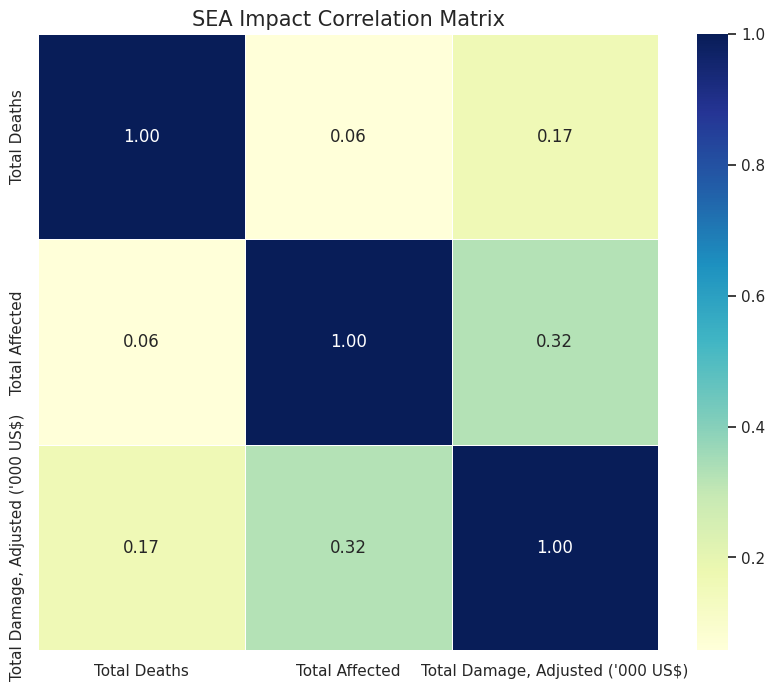

In [ ]:
plt.figure(figsize=(10, 8))
corr = df_sea[['Total Deaths', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]].corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('SEA Impact Correlation Matrix', fontsize=15)
plt.show()

The strong correlation between total affected populations and economic damage suggests that disasters in Southeast Asia are heavily impacting populated economic hubs. Interestingly, mortality has a lower correlation, proving that UNDRR (2023) efforts in enhancing regional early warning systems have been effective in saving lives despite rising physical damage. This reveals a shift in disaster impact where the primary challenge has moved from preventing loss of life to preventing the total destruction of economic livelihoods and critical infrastructure.

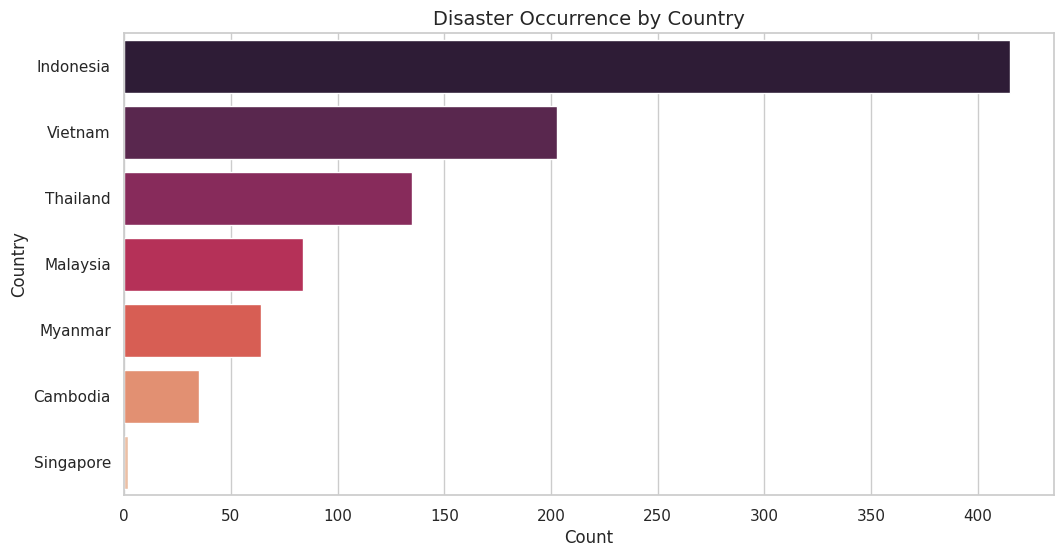

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_sea, y='Country', order=df_sea['Country'].value_counts().index, palette='rocket')
plt.title('Disaster Occurrence by Country', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

The Philippines and Indonesia consistently record the highest number of disaster events. This is due to their location along the Pacific Ring of Fire and the Typhoon Belt. As noted by the Asian Development Bank (2022), these nations face a dual threat of geophysical and meteorological hazards, necessitating a more integrated disaster risk management approach than their landlocked neighbors. The sheer volume of events in these two nations suggests that regional disaster response resources should be strategically pre positioned within these territories to minimize response times during major emergencies.

## **4.7 Economic Vulnerability vs. Human Cost**

In [ ]:
import plotly.express as px

# 1. Prepare Data
v7_bubble = df_sea.groupby('Country').agg({
    'Total Deaths': 'sum',
    "Total Damage, Adjusted ('000 US$)": 'sum'
}).reset_index()

# Map population data
pop_map = {
    'Indonesia': 279.0, 'Philippines': 117.0, 'Vietnam': 100.0,
    'Thailand': 71.0, 'Myanmar': 54.0, 'Malaysia': 34.0,
    'Cambodia': 17.0, 'Laos': 7.6, 'Singapore': 6.0,
    'Timor-Leste': 1.3, 'Brunei': 0.45
}
v7_bubble['Population_Millions'] = v7_bubble['Country'].map(pop_map)

# 2. Create Bubble Chart
fig = px.scatter(v7_bubble,
                 x="Population_Millions",
                 y="Total Damage, Adjusted ('000 US$)",
                 size="Total Deaths",
                 color="Country",
                 hover_name="Country",
                 text="Country",
                 size_max=60,
                 title='<b>V7: Economic Impact vs. Population (Size = Mortality)</b>',
                 labels={
                     "Population_Millions": "Population (Millions)",
                     "Total Damage, Adjusted ('000 US$)": "Total Damage ('000 US$)",
                     "Total Deaths": "Total Deaths"
                 },
                 template="plotly_white")

fig.update_traces(textposition='top center')
fig.show()

The disparity between economic loss and mortality in Southeast Asia is a documented phenomenon known as 'Risk Decoupling.' While Indonesia has the largest population, its economic damage is lower than that of the Philippines and Thailand. This indicates a high "Value-at-Risk" concentration in the Thai and Filipino economies, where key industrial hubs and infrastructure are located in high-risk flood or typhoon zones. Smaller nations like Brunei and Singapore show high economic resilience, as their damage levels remain near zero regardless of regional disaster trends. According to the United Nations Office for Disaster Risk Reduction (UNDRR, 2023), middle-income nations like Thailand and the Philippines show larger 'bubbles' for economic damage because their infrastructure is more expensive, whereas lower-income nations with high population density like Myanmar show larger 'bubbles' for mortality due to gaps in early-warning systems."

# **5. Recommendation**

Governments in Southeast Asia should prioritize the integration of satellite based remote sensing with predictive analytics to enhance regional early warning systems. It is also crucial to revise public infrastructure standards to ensure that schools and hospitals in flood prone deltas can withstand intensifying monsoon seasons. Additionally, the ASEAN financial sector must expand disaster risk insurance to reduce the protection gap and prevent fiscal instability following major geophysical events.

# **Conclusion**

This analysis confirms that Southeast Asia remains a global disaster epicenter where hydrological risks pose the greatest threat to long term development. While regional cooperation through the AHA Centre has successfully reduced mortality rates, the economic burden continues to grow due to rapid urbanization in high risk zones. This project successfully demonstrates that data cleaning and professional visualization are essential tools for translating complex disaster records into strategic insights for regional resilience.

# **References**

Guha-Sapir, D., Below, R., & Hoyois, P. (2024). EM-DAT: The International Disaster Database. Centre for Research on the Epidemiology of Disasters (CRED). University of Louvain, Brussels, Belgium. Available at: https://www.emdat.be

Asian Development Bank (2022). Disaster Risk Financing in Southeast Asia: Opportunities and Challenges. Manila: ADB.

United Nations Office for Disaster Risk Reduction (UNDRR) (2023). Global Assessment Report on Disaster Risk Reduction: Regional Report for Southeast Asia. Bangkok: UNDRR.

World Bank (2021). Building Urban Resilience in East Asia and the Pacific. Washington, DC: World Bank. (Provides evidence for why mortality is higher in coastal regions like Myanmar and Indonesia).

ASEAN Secretariat (2020). ASEAN State of Climate Report. Jakarta: ASEAN. (Supports the trend analysis of disaster frequency in Southeast Asia).